<a href="https://colab.research.google.com/github/chandrucs/chandrucs21-gmail.com/blob/master/Gradient_Boosting_Accuracy_0_9693.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
iammustafatz_diabetes_prediction_dataset_path = kagglehub.dataset_download('iammustafatz/diabetes-prediction-dataset')

print('Data source import complete.')


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.nunique()

,0
gender,3
age,102
hypertension,2
heart_disease,2
smoking_history,6
bmi,4247
HbA1c_level,18
blood_glucose_level,18
diabetes,2


In [7]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [8]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Cleaned column names: Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'hba1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


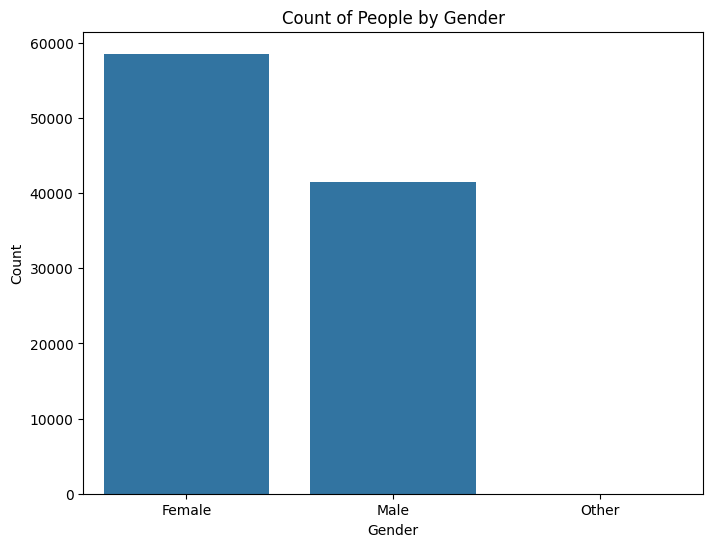

In [9]:
# Clean column names: remove spaces, make lowercase
df.columns = df.columns.str.strip().str.lower()

# Show cleaned column names (optional)
print("Cleaned column names:", df.columns)

# Check if 'gender' column exists
if 'gender' in df.columns:
    # Plot count of each gender
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='gender')
    plt.title('Count of People by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()
else:
    print("Column 'gender' not found in the dataset.")

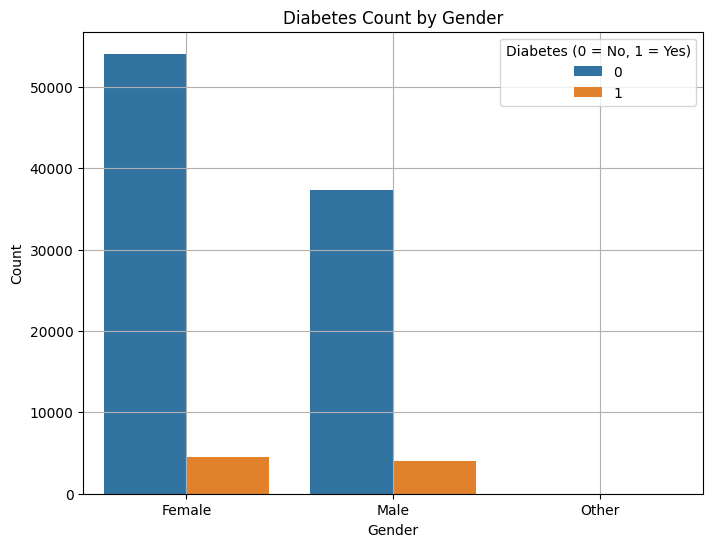

In [10]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Check if required columns exist
if 'gender' in df.columns and 'diabetes' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='gender', hue='diabetes')
    plt.title('Diabetes Count by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.legend(title='Diabetes (0 = No, 1 = Yes)')
    plt.grid(True)
    plt.show()
else:
    print("Required columns 'gender' and/or 'diabetes' not found.")


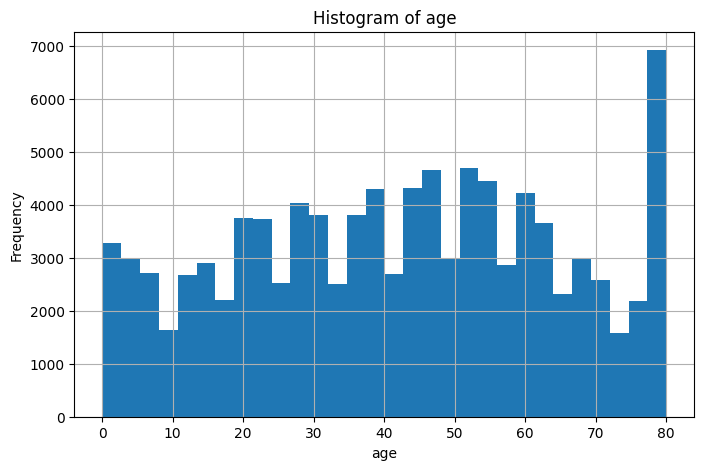

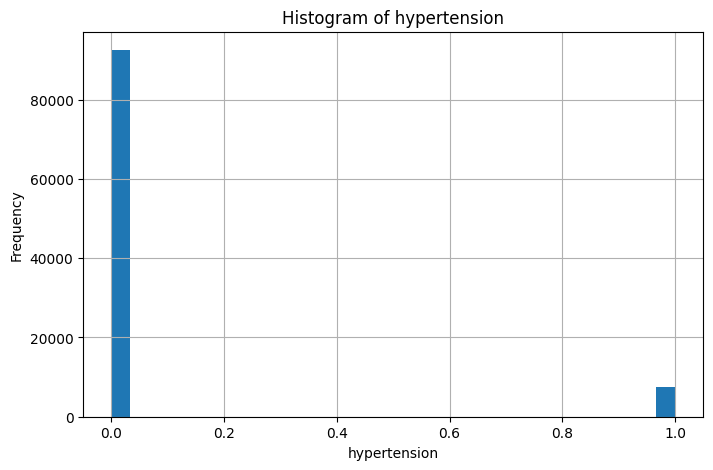

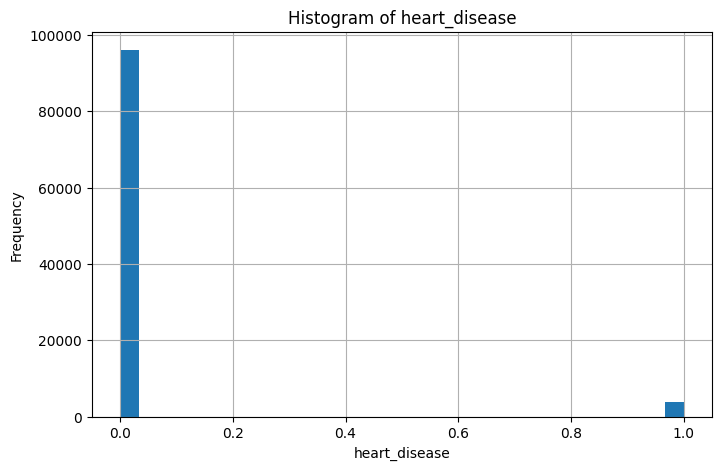

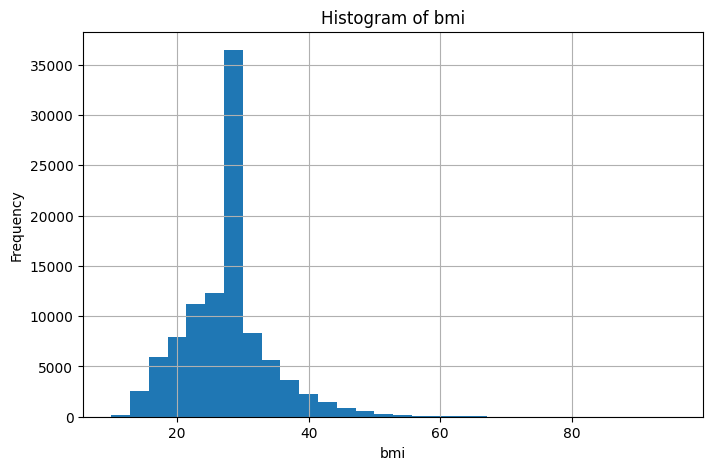

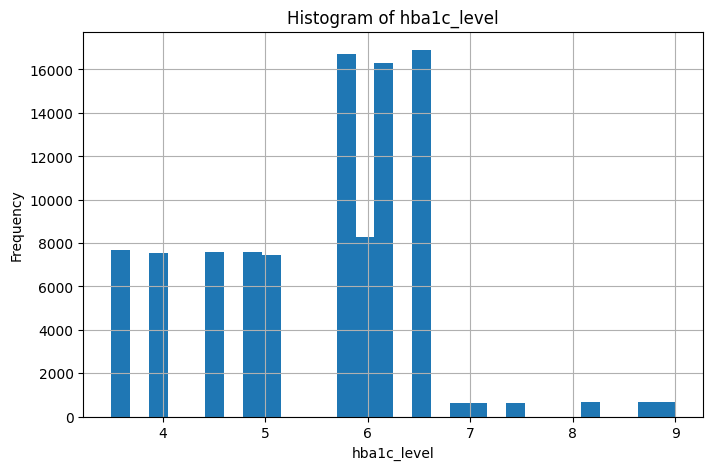

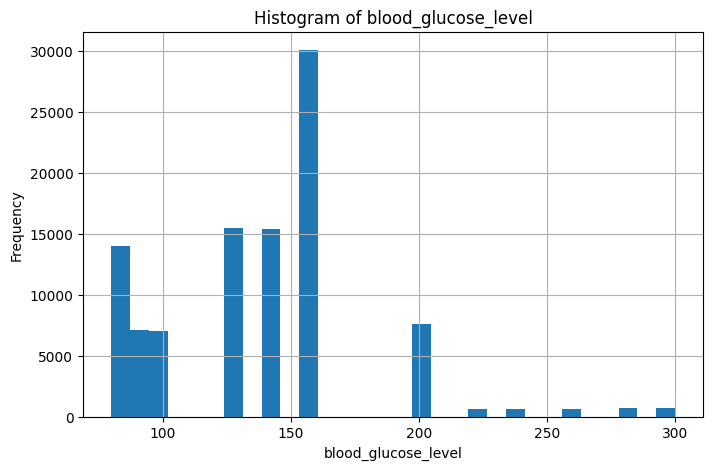

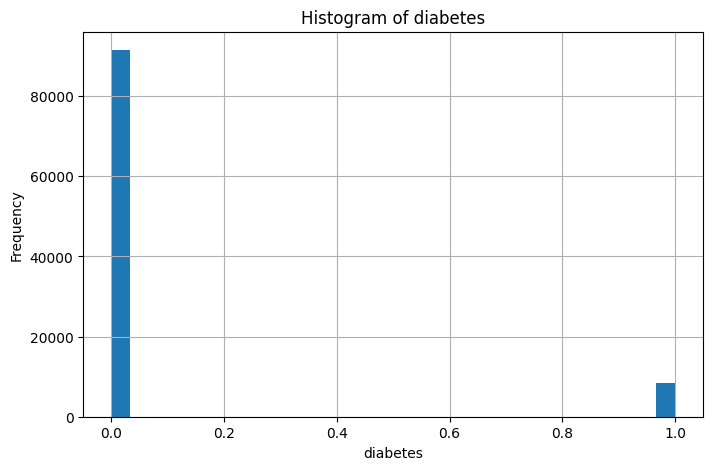

In [11]:
# Clean column names: remove spaces, make lowercase
df.columns = df.columns.str.strip().str.lower()

# List of columns to plot
columns_to_plot = [
    'age',
    'hypertension',
    'heart_disease',
    'bmi',
    'hba1c_level',
    'blood_glucose_level',
    'diabetes'
]

# Plot histogram for each variable
for col in columns_to_plot:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        plt.hist(df[col].dropna(), bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        print(f"Column '{col}' not found in the dataset.")

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'hba1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


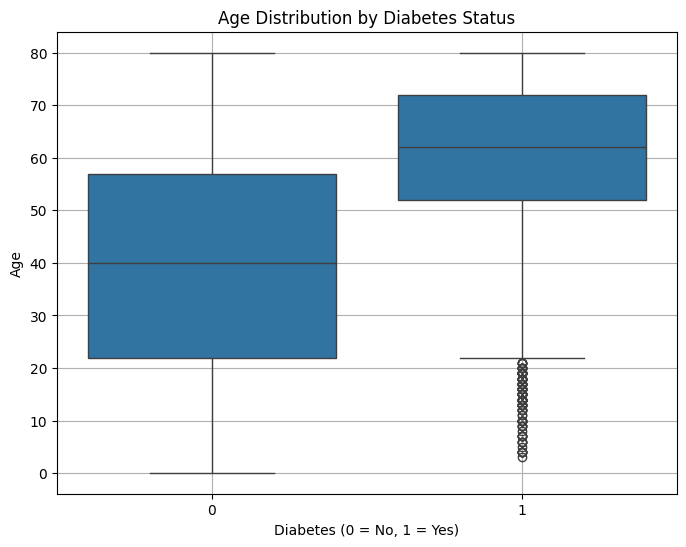

In [12]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Check columns (optional)
print(df.columns)

# Draw boxplot: age vs diabetes
if 'age' in df.columns and 'diabetes' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='diabetes', y='age')
    plt.title('Age Distribution by Diabetes Status')
    plt.xlabel('Diabetes (0 = No, 1 = Yes)')
    plt.ylabel('Age')
    plt.grid(True)
    plt.show()
else:
    print("Columns 'age' and/or 'diabetes' not found.")

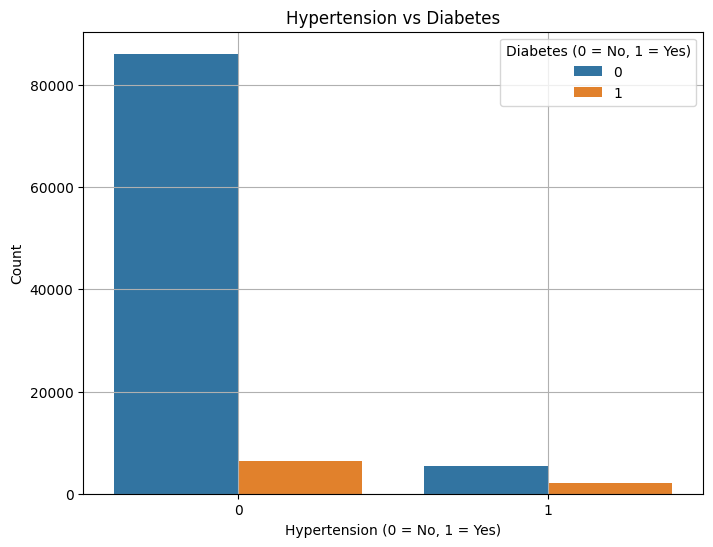

In [13]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Check if required columns exist
if 'hypertension' in df.columns and 'diabetes' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='hypertension', hue='diabetes')
    plt.title('Hypertension vs Diabetes')
    plt.xlabel('Hypertension (0 = No, 1 = Yes)')
    plt.ylabel('Count')
    plt.legend(title='Diabetes (0 = No, 1 = Yes)')
    plt.grid(True)
    plt.show()
else:
    print("Columns 'hypertension' and/or 'diabetes' not found.")

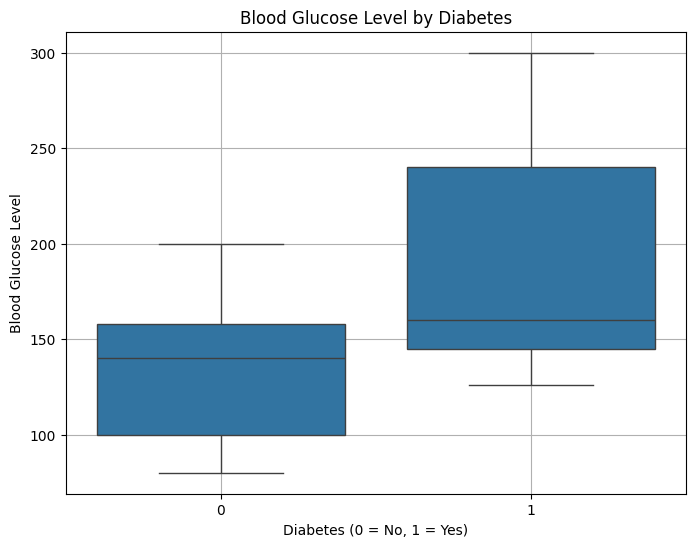

In [14]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Check if columns exist
if 'blood_glucose_level' in df.columns and 'diabetes' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
    plt.title('Blood Glucose Level by Diabetes')
    plt.xlabel('Diabetes (0 = No, 1 = Yes)')
    plt.ylabel('Blood Glucose Level')
    plt.grid(True)
    plt.show()
else:
    print("Required columns not found.")


Detecting outliers

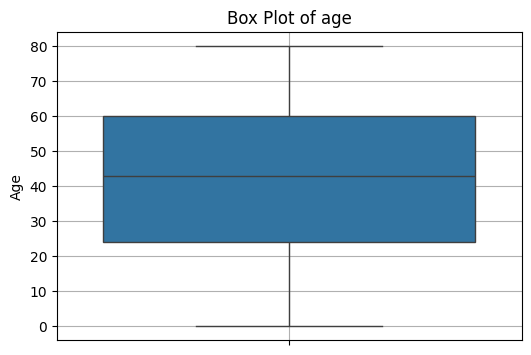

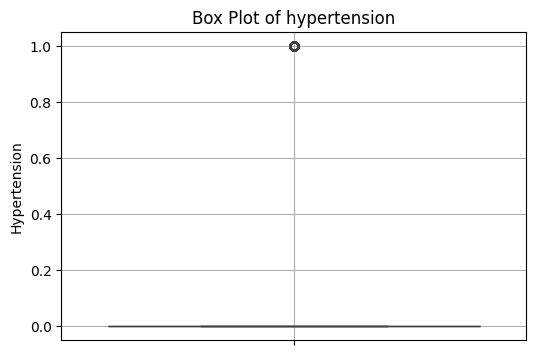

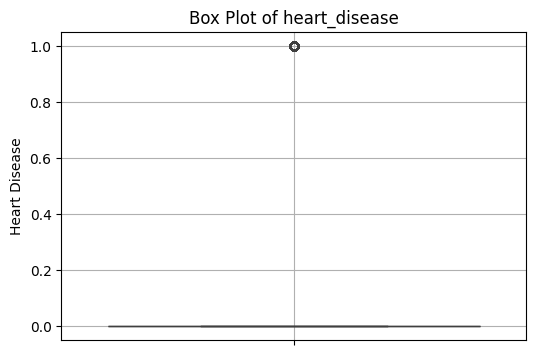

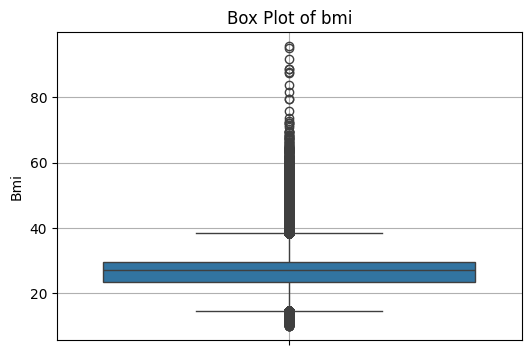

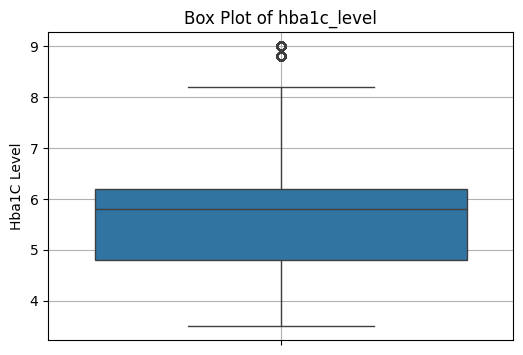

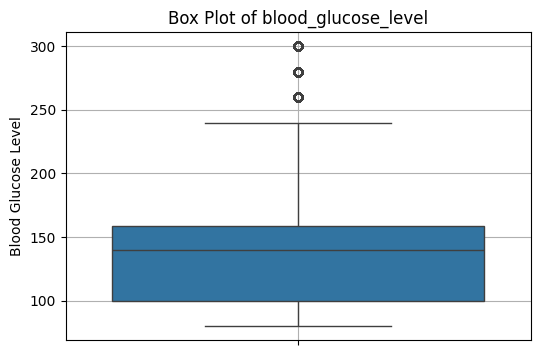

In [15]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# List of variables to plot
columns_to_plot = ['age', 'hypertension', 'heart_disease', 'bmi', 'hba1c_level', 'blood_glucose_level']

# Draw a box plot for each variable
for col in columns_to_plot:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot of {col}')
        plt.ylabel(col.replace('_', ' ').title())
        plt.grid(True)
        plt.show()
    else:
        print(f"Column '{col}' not found.")


**Handling outliers**

In [16]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# --- Helper function to calculate IQR bounds ---
def get_iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

# --- 1. Replace outliers in 'bmi' with the median ---
if 'bmi' in df.columns:
    lower, upper = get_iqr_bounds(df['bmi'])
    median_bmi = df['bmi'].median()
    df['bmi'] = df['bmi'].apply(lambda x: median_bmi if x < lower or x > upper else x)
else:
    print("Column 'bmi' not found.")

# --- 2. Remove outliers from 'hba1c_level' ---
if 'hba1c_level' in df.columns:
    lower, upper = get_iqr_bounds(df['hba1c_level'])
    df = df[(df['hba1c_level'] >= lower) & (df['hba1c_level'] <= upper)]
else:
    print("Column 'hba1c_level' not found.")

# --- 3. Remove outliers from 'blood_glucose_level' ---
if 'blood_glucose_level' in df.columns:
    lower, upper = get_iqr_bounds(df['blood_glucose_level'])
    df = df[(df['blood_glucose_level'] >= lower) & (df['blood_glucose_level'] <= upper)]
else:
    print("Column 'blood_glucose_level' not found.")

**Correlation matrix**

Correlation Matrix:
                          age       bmi  blood_glucose_level
age                  1.000000  0.374529             0.050458
bmi                  0.374529  1.000000             0.032260
blood_glucose_level  0.050458  0.032260             1.000000


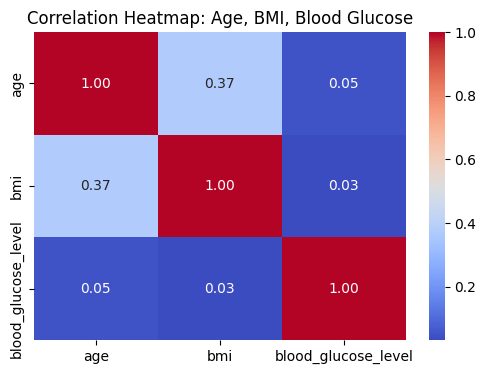

In [17]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Select only the relevant columns
cols = ['age', 'bmi', 'blood_glucose_level']
existing_cols = [col for col in cols if col in df.columns]

# Calculate the correlation matrix
correlation_matrix = df[existing_cols].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Age, BMI, Blood Glucose')
plt.show()


**Data encoding**

In [18]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# 1. Label Encoding for 'gender'
if 'gender' in df.columns:
    df['gender_encoded'] = df['gender'].map({
        'Male': 0,
        'Female': 1,
        'Other': 2  # Adjust if you have different labels
    })
else:
    print("Column 'gender' not found.")

# 2. One-Hot Encoding for 'smoking_history'
if 'smoking_history' in df.columns:
    df = pd.get_dummies(df, columns=['smoking_history'], prefix='smoking', drop_first=False)
else:
    print("Column 'smoking_history' not found.")

**Building different models**

Decision Tree Accuracy: 0.9478
Random Forest Accuracy: 0.9661
Gradient Boosting Accuracy: 0.9693
Extra Trees Accuracy: 0.9630


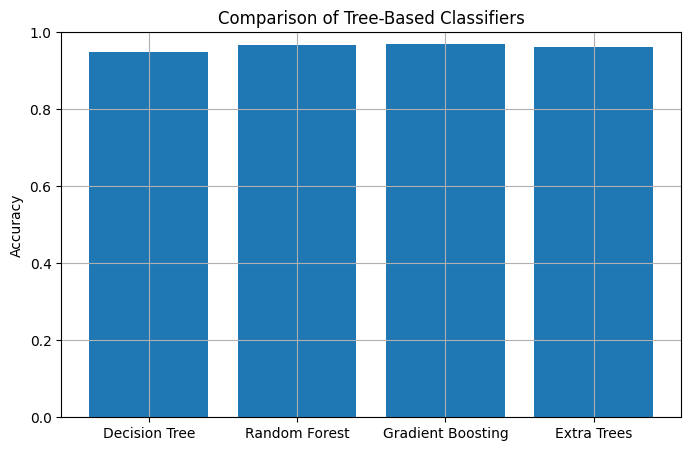

In [19]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Features and target
features = [
    'age', 'hypertension', 'heart_disease', 'bmi', 'hba1c_level',
    'blood_glucose_level', 'gender_encoded',
    'smoking_no info', 'smoking_current', 'smoking_ever',
    'smoking_former', 'smoking_never', 'smoking_not current'
]
target = 'diabetes'

# Drop missing values
df = df.dropna()

# Check required columns
missing_cols = [col for col in features + [target] if col not in df.columns]
if missing_cols:
    print(f"Missing columns: {missing_cols}")
else:
    # Prepare data
    X = df[features]
    y = df[target]

    # Split data
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Import classifiers
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
    from sklearn.metrics import accuracy_score

    # Define models
    models = {
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Extra Trees': ExtraTreesClassifier(random_state=42)
    }

    # Train and evaluate each model
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        print(f"{name} Accuracy: {acc:.4f}")

    # Plot comparison
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 5))
    plt.bar(results.keys(), results.values())
    plt.title('Comparison of Tree-Based Classifiers')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()
